In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from IPython.display import display, HTML
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# 0. Variables

In [58]:
# 1. Load
path = "C:/Users/gonza/Documents/Reale/tech_exercise_merge/Part_I/"
file = "dataset_reale.csv"


# 2. Target variable
target_variable = "label"

# 3. Input variable
input_variables = []
# 3.1. Number of variables model
num_variables = 12

# 3.2. Loop to assign values
for i in range(0, num_variables):
    # 3.2.1. Create name string of characters
    name_variable = f"inputvar_{i}"

    # 3.2.2. Asigns value using globals globals()
    globals()[name_variable] = f"columns_{i}"
    
    # 3.2.3. Create a list with the input variables
    input_variables.append(f"columns_{i}")


# 1. Reading dataset and validating dataset

Reading csv, and perform first data validation

In [59]:
# 1. Reading dataset
df = pd.read_csv(filepath_or_buffer = path + file)

# 2. Reviewing datatypes
print("Type of variable")
print(df.dtypes,"\n")


# 3. Display describe
print("Basic statistics","\n")
display(df.describe())
print("\n")

# 4. Percentage of nan values
print("Percentage nan")
print(df.isna().sum()/len(df)*100,"\n")

# 5. Target variable
print("Number of target values set at 1: ", df[target_variable].sum())
print("Percentage over the total: ", df[target_variable].sum()/len(df)*100,"%\n")

Type of variable
columns_0     float64
columns_1     float64
columns_2     float64
columns_3     float64
columns_4     float64
columns_5     float64
columns_6     float64
columns_7     float64
columns_8     float64
columns_9     float64
columns_10    float64
columns_11    float64
label           int64
dtype: object 

Basic statistics 



,columns_0,columns_1,columns_2,columns_3,columns_4,columns_5,columns_6,columns_7,columns_8,columns_9,columns_10,columns_11,label
count,5858.000000,5856.000000,5856.000000,5856.000000,5858.000000,5854.000000,5858.000000,5857.000000,5856.000000,5855.000000,5854.000000,5858.000000,5858.000000
mean,10.084987,0.456509,0.458569,8.053181,0.075232,44.896570,172.315694,1.406476,4.538341,0.735502,14.835989,8.249418,0.180608
std,1.709037,0.215407,0.196266,6.882227,0.045226,25.002479,76.319009,0.004269,0.223442,0.199040,1.694602,1.242915,0.384726
min,5.374012,0.113137,0.000000,0.848528,0.012728,1.414214,8.485281,1.395984,3.846661,0.311127,11.313708,4.242641,0.000000
25%,9.050967,0.311127,0.353553,2.545584,0.052326,25.455844,126.218560,1.403070,4.384062,0.593970,13.435029,7.071068,0.000000
50%,9.758074,0.395980,0.438406,5.091169,0.065054,42.426407,173.948268,1.406506,4.525483,0.707107,14.566400,8.485281,0.000000
75%,10.748023,0.530330,0.551543,12.020815,0.082024,60.811183,224.859956,1.409745,4.681047,0.834386,15.980613,8.485281,0.000000
max,22.485996,2.234457,2.347595,93.055252,0.864084,408.707720,622.253967,1.469340,5.670996,2.800143,21.071782,12.727922,1.000000




Percentage nan
columns_0     0.000000
columns_1     0.034141
columns_2     0.034141
columns_3     0.034141
columns_4     0.000000
columns_5     0.068283
columns_6     0.000000
columns_7     0.017071
columns_8     0.034141
columns_9     0.051212
columns_10    0.068283
columns_11    0.000000
label         0.000000
dtype: float64 

Number of target values set at 1:  1058
Percentage over the total:  18.06077159440082 %



### First assumption
My preferred approach to handling missing values in a dataset is to try to infer them as much as possible. This inference can be done by using other variables within the dataset or by incorporating additional information that was not previously included.

This approach allows for data preservation, but it comes with limitations. When using data already present in the dataset, there is a risk of future collinearity issues. It would be particularly interesting to apply this approach in cases where we do not plan to use the variable used for reconstruction. 

On the other hand, the use of external data hinges on a correlation between the variable to be inferred and the one used. However, this might lead to distortion of the original data.

*** However, given the small number of values that are being lost, nan values from the sample are going to be removed ***

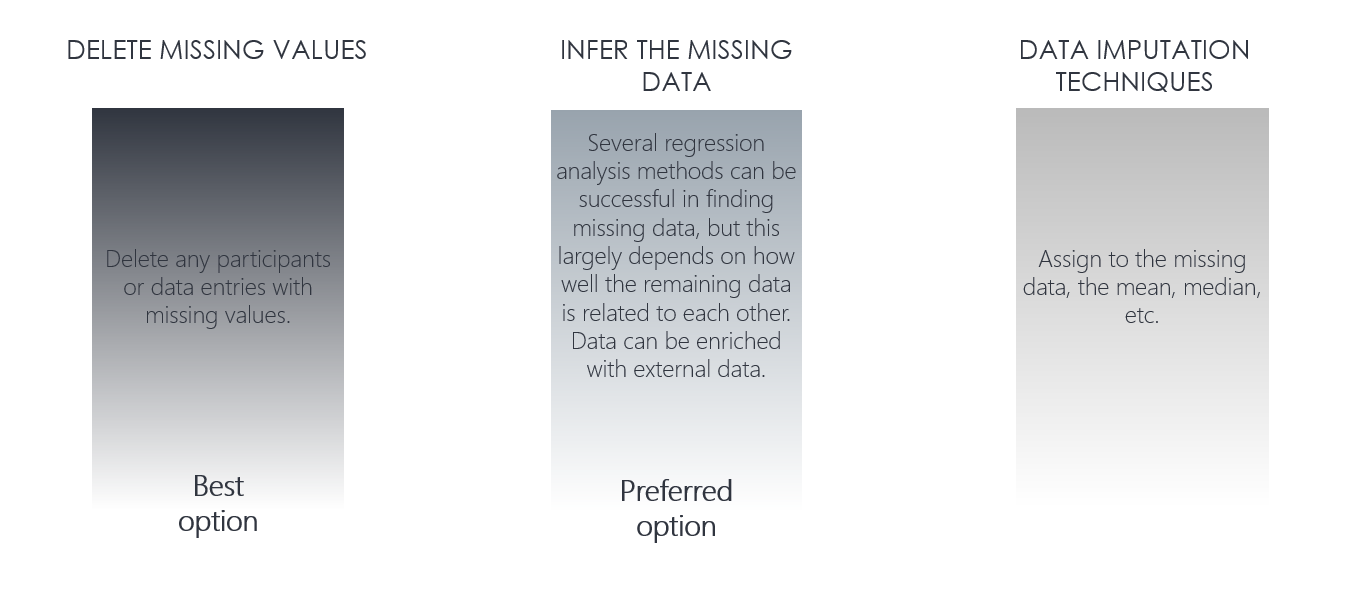

In [60]:
# 6. Drop NaN values
df_1 = df.dropna()
print("Size dataframe priot missings are being filtered out: ", len(df), "\n")
print("Size dataframe once missing are being filtered out:  ",len(df_1))
print("Percentage data removed:", (1 -len(df_1)/len(df)), "\n")

# 7. Making sure not to many target variables are being lost
print("Number of target values set at 1: ", df_1[target_variable].sum())
print("Percentage over the total: ", df_1[target_variable].sum()/len(df)*100,"%\n")

Size dataframe priot missings are being filtered out:  5858 

Size dataframe once missing are being filtered out:   5838
Percentage data removed: 0.0034141345168999804 

Number of target values set at 1:  1053
Percentage over the total:  17.975418231478322 %



# 2. Feature transformation
In order to increase the options some transformations are going to be perfomed in the dataset 

## 2.1. Box - Cox

In [61]:
df_2 = apply_boxcox_transformation(df_1, input_variables)

# Storing input variables with box cox transformation
input_variables_bc = []

for i in input_variables:
    input_variables_bc.append(i + "_bc")

## 2.2. Standardized data

In [62]:
df_3 = standardize_columns(df_2, input_variables_bc)


input_variables_bc_sc = []
for i in input_variables_bc:
    input_variables_bc_sc.append(i + "_sc")

# 3. Data exploration

## 3.1. Initial data

count    5838.000000
mean       10.085453
std         1.710191
min         5.374012
25%         9.050967
50%         9.758074
75%        10.748023
max        22.485996
Name: columns_0, dtype: float64

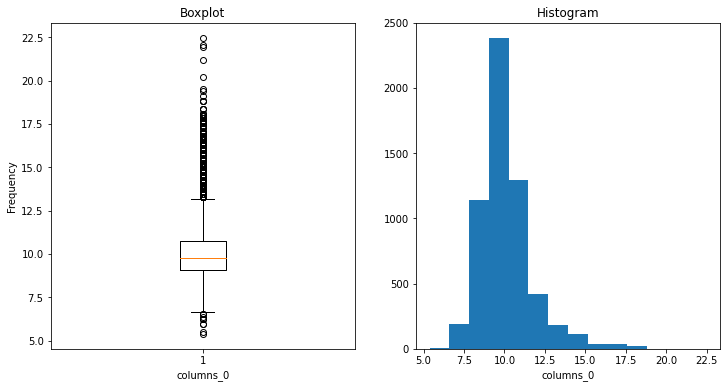

IQR: 1.6970562748477125
Outliers: < 6.505382386916241    > 13.293607486307092  - Count: 309  - Percentage: 5.292908530318603 %
Extreme outliers: < 3.9597979746446725    > 15.83919189857866  - Count: 89  - Percentage: 1.5244946899623157 %

Kurtosis: 5.448300028691922
Skewness: 1.7132165131219712


count    5838.000000
mean        0.456436
std         0.215480
min         0.113137
25%         0.311127
50%         0.395980
75%         0.523259
max         2.234457
Name: columns_1, dtype: float64

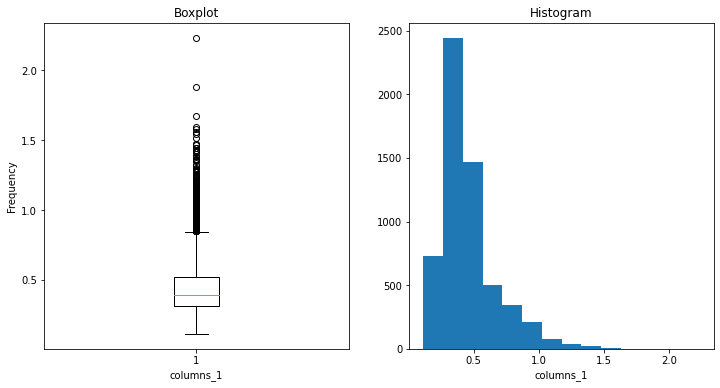

IQR: 0.21213203435596428
Outliers: < -0.007071067811865506    > 0.8414570696119916  - Count: 432  - Percentage: 7.399794450154163 %
Extreme outliers: < -0.32526911934581193    > 1.159655121145938  - Count: 67  - Percentage: 1.1476533059266871 %

Kurtosis: 3.896008141730067
Skewness: 1.6740807674210259


count    5838.000000
mean        0.458730
std         0.196285
min         0.000000
25%         0.353553
50%         0.438406
75%         0.551543
max         2.347595
Name: columns_2, dtype: float64

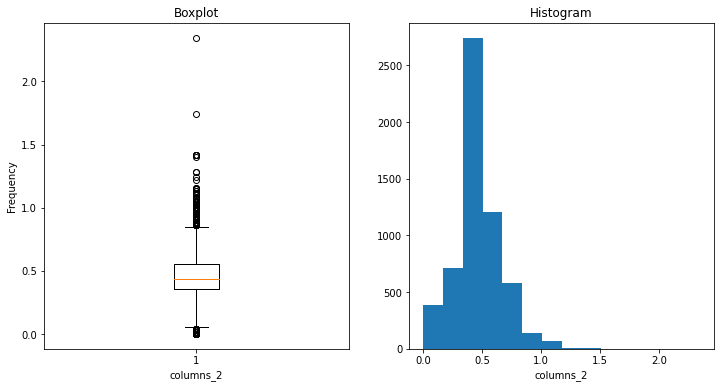

IQR: 0.19798989873223333
Outliers: < 0.05656854249492377    > 0.8485281374238571  - Count: 389  - Percentage: 6.663240835902706 %
Extreme outliers: < -0.24041630560342625    > 1.145512985522207  - Count: 14  - Percentage: 0.2398081534772182 %

Kurtosis: 3.1672207899300275
Skewness: 0.6246069213321526


count    5838.000000
mean        8.062798
std         6.885798
min         0.848528
25%         2.545584
50%         5.091169
75%        12.020815
max        93.055252
Name: columns_3, dtype: float64

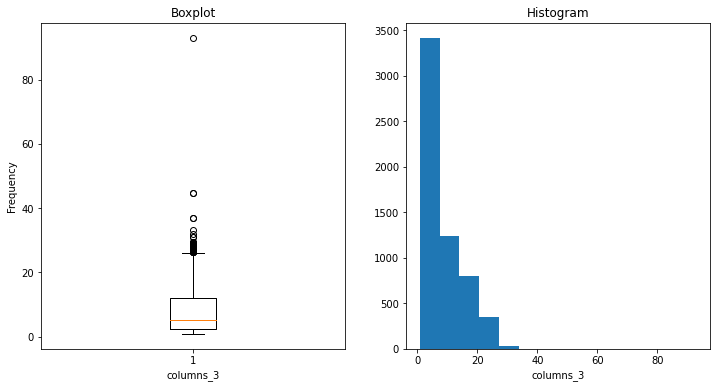

IQR: 9.475230867899736
Outliers: < -11.667261889578032    > 26.23366158202091  - Count: 54  - Percentage: 0.9249743062692704 %
Extreme outliers: < -25.880108191427638    > 40.44650788387052  - Count: 3  - Percentage: 0.051387461459403906 %

Kurtosis: 4.095389115598439
Skewness: 1.3352124275811565


count    5838.000000
mean        0.075226
std         0.045259
min         0.012728
25%         0.052326
50%         0.065054
75%         0.082024
max         0.864084
Name: columns_4, dtype: float64

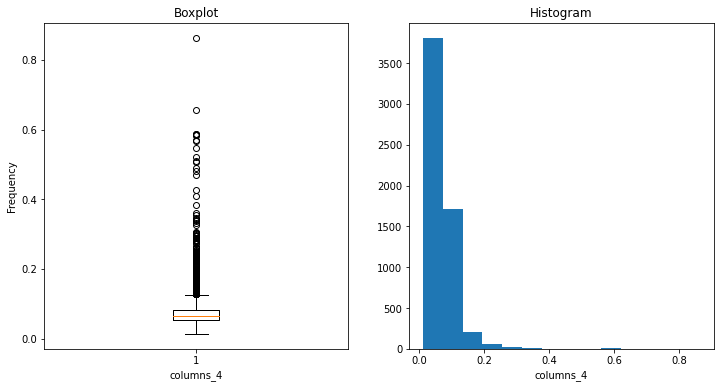

IQR: 0.029698484809835002
Outliers: < 0.007778174593051995    > 0.126572113832392  - Count: 401  - Percentage: 6.868790681740322 %
Extreme outliers: < -0.03676955262170051    > 0.1711198410471445  - Count: 146  - Percentage: 2.50085645769099 %

Kurtosis: 53.28267472060155
Skewness: 5.4974089149006256


count    5838.000000
mean       44.901159
std        25.006361
min         1.414214
25%        25.455844
50%        42.426407
75%        60.811183
max       408.707720
Name: columns_5, dtype: float64

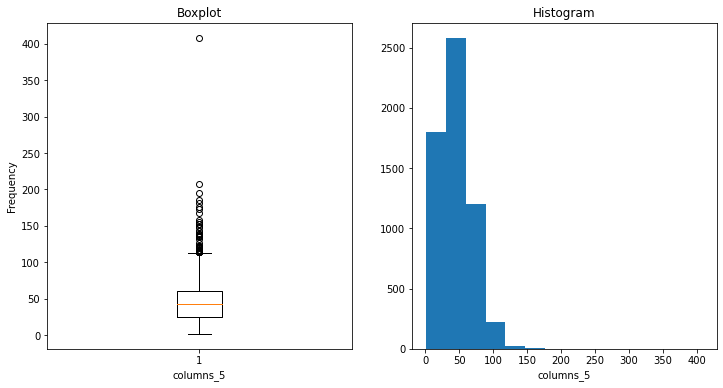

IQR: 35.35533905932737
Outliers: < -27.577164466275335    > 113.84419177103413  - Count: 49  - Percentage: 0.8393285371702638 %
Extreme outliers: < -80.61017305526639    > 166.8772003600252  - Count: 8  - Percentage: 0.1370332305584104 %

Kurtosis: 8.725166212165824
Skewness: 1.2492494948523687


count    5838.000000
mean      172.326816
std        76.315923
min         8.485281
25%       125.865007
50%       173.948268
75%       224.859956
max       622.253967
Name: columns_6, dtype: float64

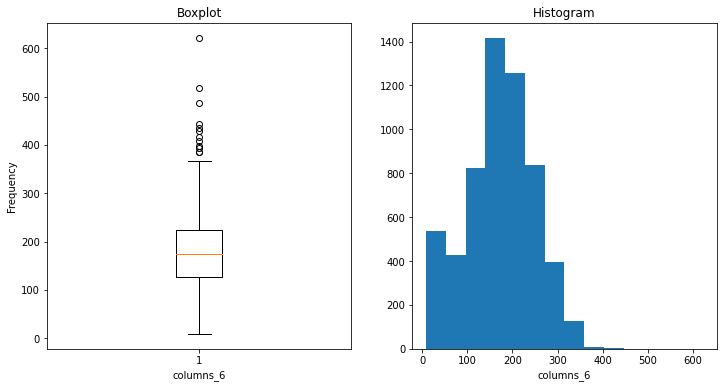

IQR: 98.99494936611663
Outliers: < -22.627416997969448    > 373.35238046649704  - Count: 12  - Percentage: 0.20554984583761562 %
Extreme outliers: < -171.11984104714438    > 521.844804515672  - Count: 1  - Percentage: 0.0171291538198013 %

Kurtosis: -0.09036051921110833
Skewness: -0.05181161955859681


count    5838.000000
mean        1.406480
std         0.004271
min         1.395984
25%         1.403070
50%         1.406520
75%         1.409745
max         1.469340
Name: columns_7, dtype: float64

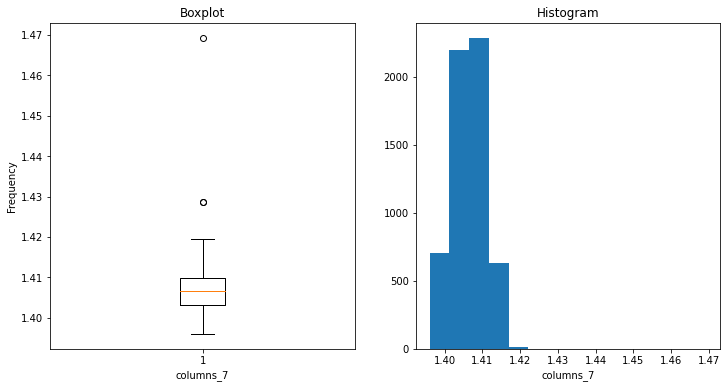

IQR: 0.006675088014400643
Outliers: < 1.3930569274799944    > 1.419757279537597  - Count: 3  - Percentage: 0.051387461459403906 %
Extreme outliers: < 1.3830442954583935    > 1.429769911559198  - Count: 1  - Percentage: 0.0171291538198013 %

Kurtosis: 7.308407753494458
Skewness: 0.6289775820998704


count    5838.000000
mean        4.538499
std         0.223549
min         3.846661
25%         4.384062
50%         4.525483
75%         4.681047
max         5.670996
Name: columns_8, dtype: float64

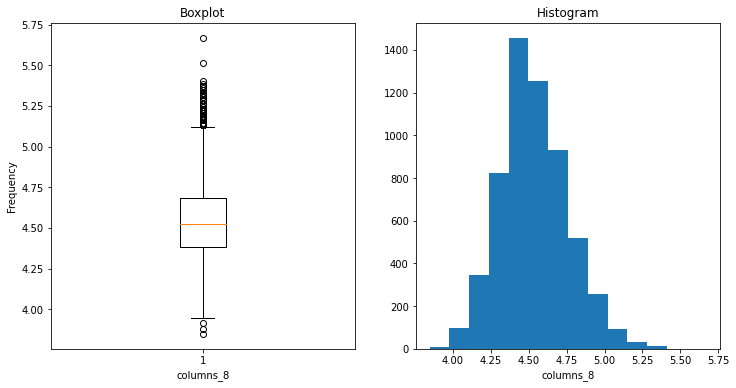

IQR: 0.2969848480983499
Outliers: < 3.93858477120907    > 5.12652416360247  - Count: 63  - Percentage: 1.079136690647482 %
Extreme outliers: < 3.493107499061545    > 5.5720014357499945  - Count: 1  - Percentage: 0.0171291538198013 %

Kurtosis: 0.3587579304601416
Skewness: 0.3994418564511277


count    5838.000000
mean        0.735563
std         0.199237
min         0.311127
25%         0.593970
50%         0.707107
75%         0.834386
max         2.800143
Name: columns_9, dtype: float64

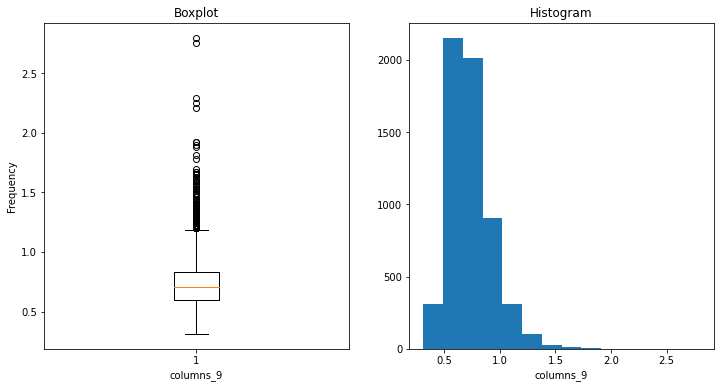

IQR: 0.2404163056034262
Outliers: < 0.23334523779156063    > 1.1950104602052654  - Count: 151  - Percentage: 2.5865022267899964 %
Extreme outliers: < -0.12727922061357866    > 1.5556349186104046  - Count: 26  - Percentage: 0.4453579993148339 %

Kurtosis: 7.516666476747347
Skewness: 1.6690941033906252


count    5838.000000
mean       14.835686
std         1.694790
min        11.313708
25%        13.435029
50%        14.566400
75%        15.980613
max        21.071782
Name: columns_10, dtype: float64

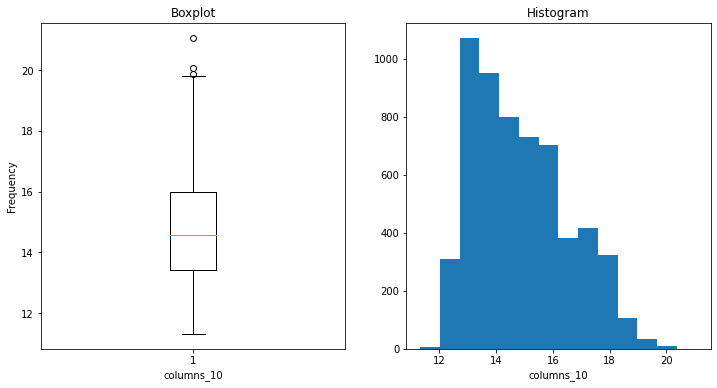

IQR: 2.5455844122715714
Outliers: < 9.616652224137049    > 19.798989873223334  - Count: 3  - Percentage: 0.051387461459403906 %
Extreme outliers: < 5.798275605729691    > 23.61736649163069  - Count: 0  - Percentage: 0.0 %

Kurtosis: -0.5573321570380649
Skewness: 0.5512905935587223


count    5838.000000
mean        8.249337
std         1.243589
min         4.242641
25%         7.071068
50%         8.485281
75%         8.485281
max        12.727922
Name: columns_11, dtype: float64

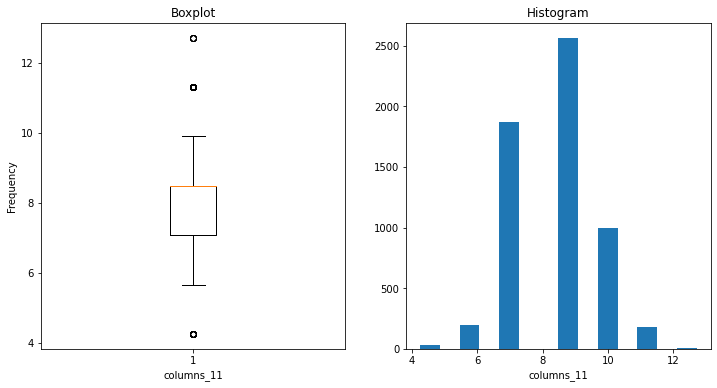

IQR: 1.414213562373095
Outliers: < 4.949747468305834    > 10.606601717798213  - Count: 216  - Percentage: 3.6998972250770814 %
Extreme outliers: < 2.8284271247461916    > 12.727922061357855  - Count: 0  - Percentage: 0.0 %

Kurtosis: 0.23634946744875673
Skewness: 0.17345062179626194


In [63]:
for i in input_variables:
    data_exploration(df_3,i)

### Findings:
- Column0: Some ammount of outliers, nothing really odd, leptocurtic, significante skewness,not close to a normal distribution, looks more like a chi-squared.
- Column1 Some ammount of outliers, nothing really odd, leptocurtic, significante skewness,not close to a normal distribution, looks more like a chi-squared.
- Column2 Some ammount of outliers, nothing really odd, leptocurtic,not close to a normal distribution, looks more like a chi-squared.
- Column3 little ammount of outliersm, nothing really odd, leptocurtic, significante skewness,not close to a normal distribution, looks more like a chi-squared.
- Column4 little ammount of outliersm, nothing really odd, leptocurtic, significante skewness,not close to a normal distribution, looks more like a chi-squared.
- Column5 little ammount of outliersm, nothing really odd, leptocurtic, significante skewness,not close to a normal distribution, looks more like a chi-squared.
- Column6 little ammount of outliersm, nothing really odd,  looks more like a normal distribution.
- Column7 little ammount of outliersm, looks more like a normal distribution, very small std, hence small variance.
- Column8 close to a normal
- Column9 Some ammount of outliers, nothing really odd, leptocurtic, significante skewness,not close to a normal distribution, looks more like a chi-squared.
- Column10 Some ammount of outliers, nothing really odd, platykurtic.
- Column 11:Some ammount of outliers, looks close to a normal distribution.

## 3.2. After Standard Scaler (also after Box - Cox)

count    5.838000e+03
mean     1.712828e-14
std      1.000086e+00
min     -6.102508e+00
25%     -5.795242e-01
50%     -3.958590e-02
75%      5.836170e-01
max      3.511011e+00
Name: columns_0_bc_sc, dtype: float64

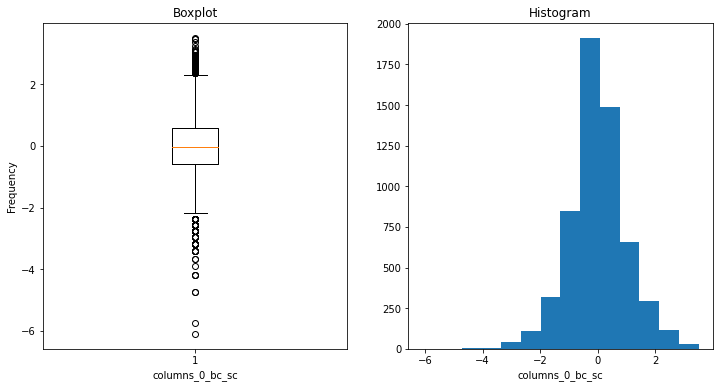

IQR: 1.1631411906060727
Outliers: < -2.3242359778365254    > 2.3283287845877654  - Count: 210  - Percentage: 3.597122302158273 %
Extreme outliers: < -4.068947763745634    > 4.073040570496874  - Count: 7  - Percentage: 0.1199040767386091 %

Kurtosis: 1.3002216582494066
Skewness: -0.06856068943172923


count    5.838000e+03
mean    -1.209683e-16
std      1.000086e+00
min     -3.817921e+00
25%     -6.675282e-01
50%     -5.358946e-02
75%      6.001419e-01
max      3.213677e+00
Name: columns_1_bc_sc, dtype: float64

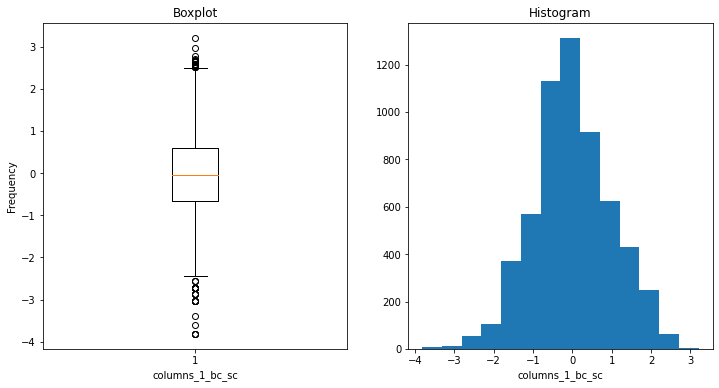

IQR: 1.2676700760968056
Outliers: < -2.5690332923149777    > 2.5016470120722447  - Count: 51  - Percentage: 0.8735868448098663 %
Extreme outliers: < -4.470538406460186    > 4.403152126217453  - Count: 0  - Percentage: 0.0 %

Kurtosis: -0.01036529742048753
Skewness: 0.0030891518697062637


count    5.838000e+03
mean     6.823365e-17
std      1.000086e+00
min     -2.960947e+00
25%     -4.704346e-01
50%     -3.745544e-02
75%      5.079510e-01
max      7.244628e+00
Name: columns_2_bc_sc, dtype: float64

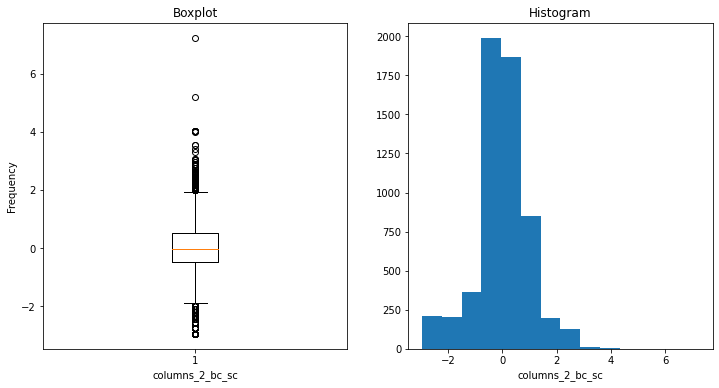

IQR: 0.978385566989857
Outliers: < -1.93801295681104    > 1.9755293111483878  - Count: 462  - Percentage: 7.913669064748201 %
Extreme outliers: < -3.4055913072958255    > 3.4431076616331735  - Count: 10  - Percentage: 0.17129153819801302 %

Kurtosis: 2.049526175118001
Skewness: -0.1575518031488627


count    5.838000e+03
mean     1.362011e-16
std      1.000086e+00
min     -2.302136e+00
25%     -8.768831e-01
50%     -5.472619e-02
75%      8.885333e-01
max      2.835283e+00
Name: columns_3_bc_sc, dtype: float64

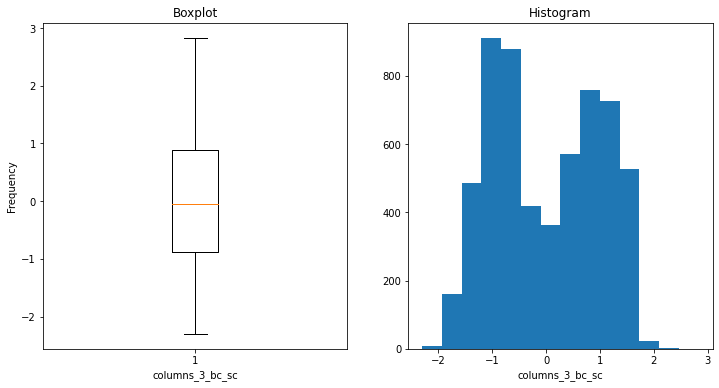

IQR: 1.7654163662197084
Outliers: < -3.5250076335152047    > 3.5366578313636285  - Count: 0  - Percentage: 0.0 %
Extreme outliers: < -6.173132182844768    > 6.184782380693191  - Count: 0  - Percentage: 0.0 %

Kurtosis: -1.3217063337380788
Skewness: 0.0389453407229987


count    5.838000e+03
mean     5.318725e-16
std      1.000086e+00
min     -6.616484e+00
25%     -6.138187e-01
50%     -1.336073e-02
75%      5.574843e-01
max      3.757234e+00
Name: columns_4_bc_sc, dtype: float64

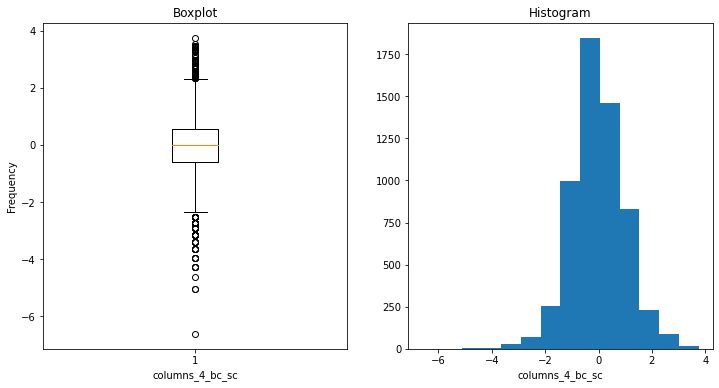

IQR: 1.1713029457632353
Outliers: < -2.370773069680956    > 2.314438713371985  - Count: 175  - Percentage: 2.997601918465228 %
Extreme outliers: < -4.127727488325809    > 4.071393132016838  - Count: 8  - Percentage: 0.1370332305584104 %

Kurtosis: 1.4348110516530452
Skewness: -0.07899566294840213


count    5.838000e+03
mean    -2.731057e-16
std      1.000086e+00
min     -2.808650e+00
25%     -7.234581e-01
50%      5.138929e-02
75%      7.242371e-01
max      7.084518e+00
Name: columns_5_bc_sc, dtype: float64

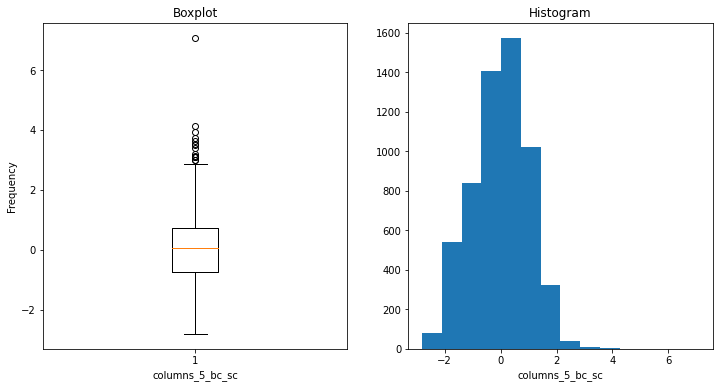

IQR: 1.447695146760866
Outliers: < -2.895000796047754    > 2.89577979099571  - Count: 15  - Percentage: 0.2569373072970195 %
Extreme outliers: < -5.0665435161890535    > 5.067322511137009  - Count: 1  - Percentage: 0.0171291538198013 %

Kurtosis: 0.13247398947514988
Skewness: -0.025275971163062013


count    5.838000e+03
mean    -2.444564e-16
std      1.000086e+00
min     -2.221608e+00
25%     -5.947899e-01
50%      3.539220e-02
75%      6.918952e-01
max      5.613215e+00
Name: columns_6_bc_sc, dtype: float64

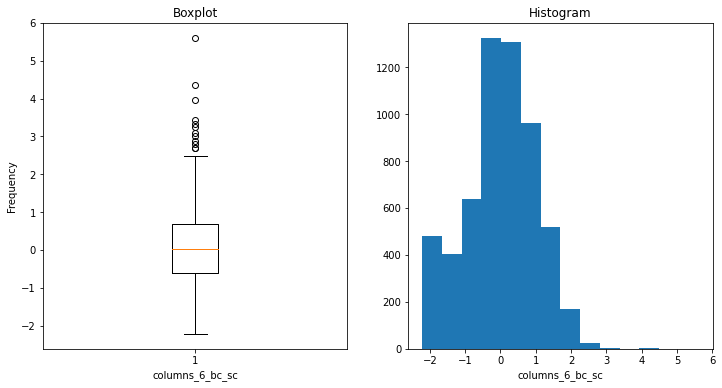

IQR: 1.2866850539678554
Outliers: < -2.524817438883601    > 2.6219227769878204  - Count: 12  - Percentage: 0.20554984583761562 %
Extreme outliers: < -4.454845019835384    > 4.551950357939603  - Count: 1  - Percentage: 0.0171291538198013 %

Kurtosis: -0.12473068339585591
Skewness: -0.130259023412027


count    5.838000e+03
mean    -4.320608e-11
std      1.000086e+00
min     -2.765180e+00
25%     -7.921200e-01
50%      5.848206e-02
75%      7.947597e-01
max      8.001356e+00
Name: columns_7_bc_sc, dtype: float64

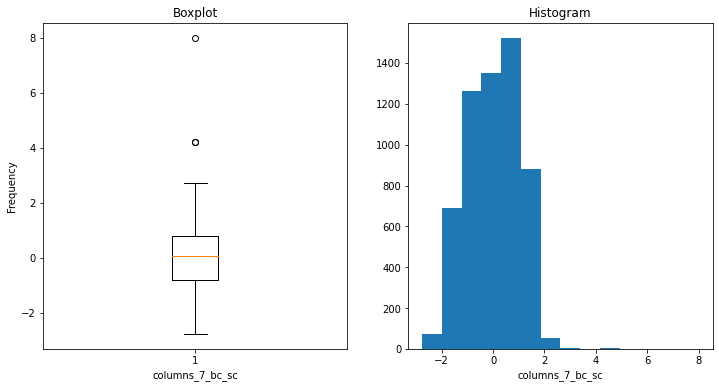

IQR: 1.5868796137874854
Outliers: < -3.1724393754532625    > 3.1750790796966792  - Count: 3  - Percentage: 0.051387461459403906 %
Extreme outliers: < -5.552758796134491    > 5.555398500377907  - Count: 1  - Percentage: 0.0171291538198013 %

Kurtosis: -0.07878850181846309
Skewness: -0.012328173686674047


count    5.838000e+03
mean     2.172462e-14
std      1.000086e+00
min     -3.821455e+00
25%     -6.656586e-01
50%      5.145329e-03
75%      6.824460e-01
max      3.899257e+00
Name: columns_8_bc_sc, dtype: float64

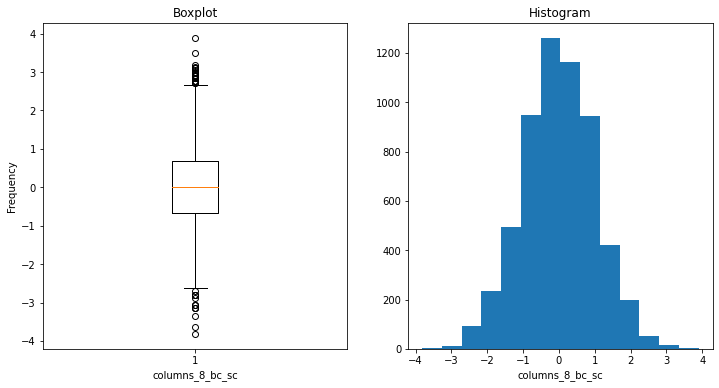

IQR: 1.3481045891066743
Outliers: < -2.6878154608347145    > 2.704602895591983  - Count: 39  - Percentage: 0.6680369989722508 %
Extreme outliers: < -4.709972344494726    > 4.726759779251995  - Count: 0  - Percentage: 0.0 %

Kurtosis: 0.020483630136544306
Skewness: -0.0005529407971097081


count    5.838000e+03
mean     7.911147e-17
std      1.000086e+00
min     -4.021008e+00
25%     -7.064363e-01
50%      2.974352e-02
75%      6.756007e-01
max      4.153200e+00
Name: columns_9_bc_sc, dtype: float64

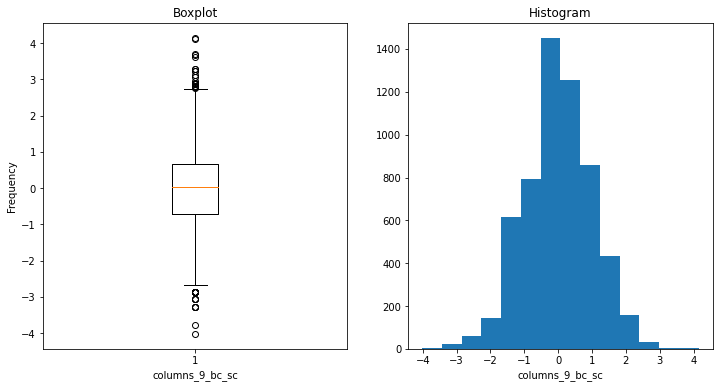

IQR: 1.3820370065428527
Outliers: < -2.779491767107312    > 2.7486562590640986  - Count: 46  - Percentage: 0.7879410757108599 %
Extreme outliers: < -4.852547276921591    > 4.8217117688783775  - Count: 0  - Percentage: 0.0 %

Kurtosis: 0.15740679073544195
Skewness: -0.006747464899099044


count    5.838000e+03
mean     3.147631e-14
std      1.000086e+00
min     -2.961861e+00
25%     -8.187381e-01
50%     -1.232897e-02
75%      7.821977e-01
max      2.515286e+00
Name: columns_10_bc_sc, dtype: float64

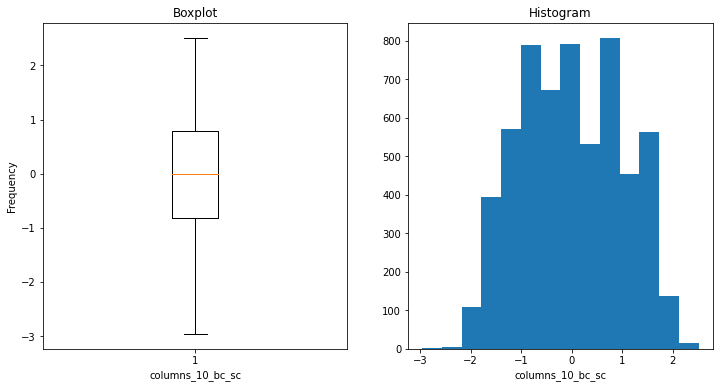

IQR: 1.6009357979886794
Outliers: < -3.2201417952809823    > 3.183601396673735  - Count: 0  - Percentage: 0.0 %
Extreme outliers: < -5.621545492264001    > 5.585005093656754  - Count: 0  - Percentage: 0.0 %

Kurtosis: -0.9805555442514424
Skewness: 0.06516233209871926


count    5.838000e+03
mean    -1.241080e-15
std      1.000086e+00
min     -3.502003e+00
25%     -9.448602e-01
50%      2.116384e-01
75%      2.116384e-01
max      3.376090e+00
Name: columns_11_bc_sc, dtype: float64

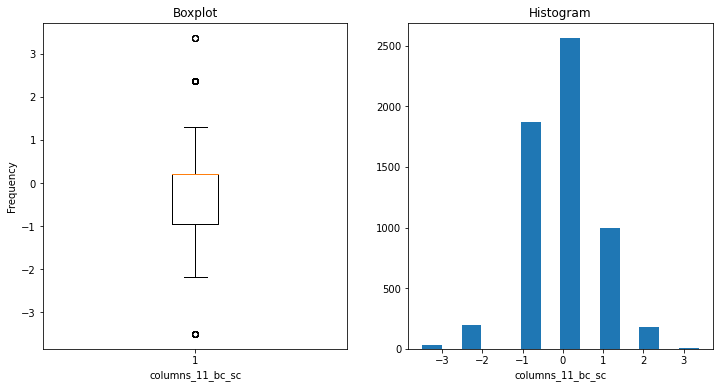

IQR: 1.1564985727133332
Outliers: < -2.6796080541896887    > 1.9463862366636442  - Count: 216  - Percentage: 3.6998972250770814 %
Extreme outliers: < -4.414355913259689    > 3.681134095733644  - Count: 0  - Percentage: 0.0 %

Kurtosis: 0.3168252184874354
Skewness: 0.013697958356122792


In [64]:
for i in input_variables_bc_sc:
    data_exploration(df_3,i)

### Main goals seek by using box cox transformation:
- Normalizing Data: Converts non-normal data to a more normal distribution, enhancing the efficacy of many statistical methods, given that norma distributions are assumed in some of them.
- Variance: Makes variance more constant, which is crucial for analyses like linear regression, given that some algorithms assume homocedasticity.
- Reducing Skewness: helps to reduces bias and leads to a more symmetric distribution.

### Main goals tackle by scaling data

Uniform Scale for All Features:
The Standard Scaler transforms data to have a mean of 0 and a standard deviation of 1, crucial for handling features in different scales and units, thereby ensuring an equitable contribution of each feature to the analysis or model.

Accelerated Optimization:
In methods like gradient descent, standardization equalizes the scale of all features, speeding up convergence to the optimum.

Bias Neutralization from High Variance:
Standardization prevents features with high variance from unduly dominating the model, which could skew results.

Enhanced Interpretability of Coefficients:
In linear models, standardization aids in interpreting coefficients, reflecting the proportional and standardized contribution of each feature.

## 4.2. Multivariate Analysis

### 4.2.1. Pearson

#### Initial Data

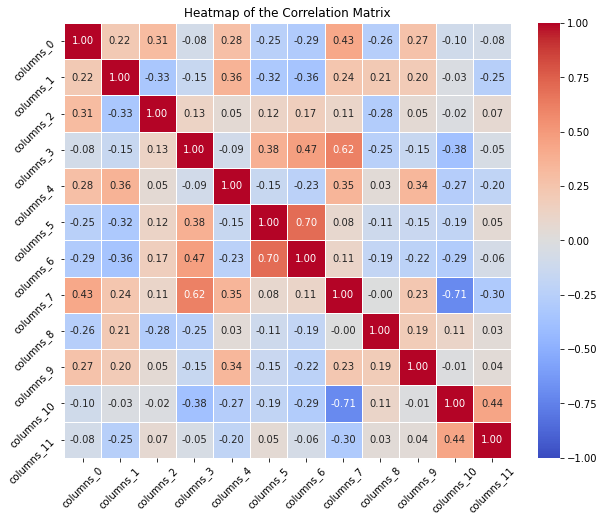

,Variable1,Variable2,Correlation
66,columns_5,columns_6,0.700304
77,columns_6,columns_5,0.700304
94,columns_7,columns_10,-0.710160
127,columns_10,columns_7,-0.710160


In [65]:
# Assuming df_1 is your DataFrame and input_variables are the columns of interest
# Calculate the correlation matrix
corr_matrix = df_3[input_variables].corr()
create_heatmap(corr_matrix)
find_strong_correlations(corr_matrix, threshold=0.7)

#### Standarization

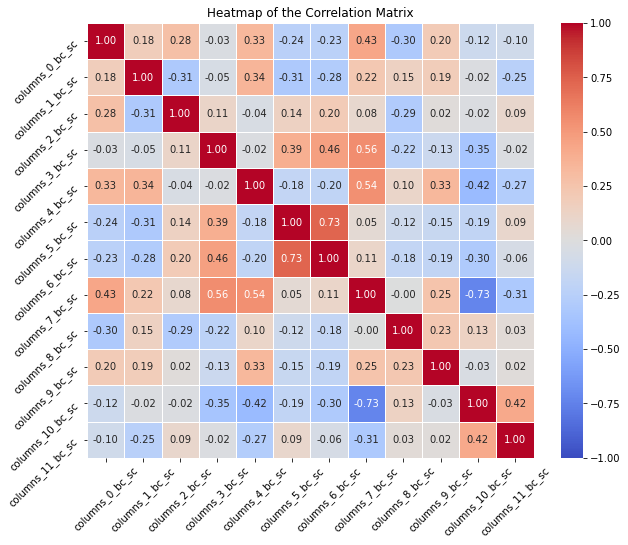

,Variable1,Variable2,Correlation
66,columns_5_bc_sc,columns_6_bc_sc,0.731597
77,columns_6_bc_sc,columns_5_bc_sc,0.731597
94,columns_7_bc_sc,columns_10_bc_sc,-0.730221
127,columns_10_bc_sc,columns_7_bc_sc,-0.730221


In [66]:
# Assuming df_1 is your DataFrame and input_variables are the columns of interest
# Calculate the correlation matrix
corr_matrix = df_3[input_variables_bc_sc].corr()
create_heatmap(corr_matrix)
find_strong_correlations(corr_matrix, threshold=0.7)

### 4.2.2. Spearman and boxcox

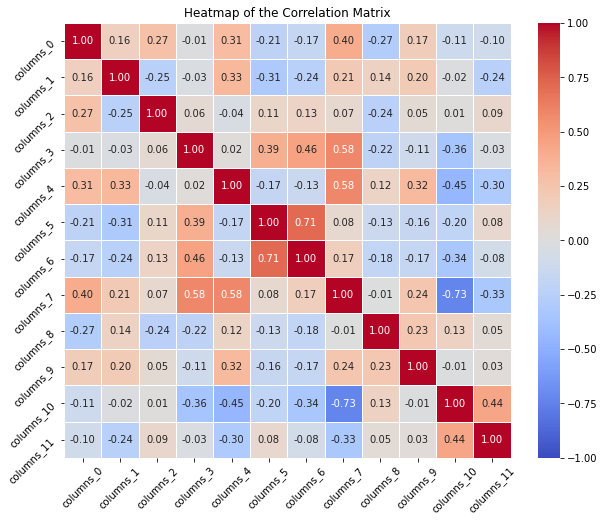

,Variable1,Variable2,Correlation
66,columns_5,columns_6,0.714493
77,columns_6,columns_5,0.714493
94,columns_7,columns_10,-0.730235
127,columns_10,columns_7,-0.730235


In [67]:
# Calculate the Spearman correlation matrix
corr_matrix = df_3[input_variables].corr(method='spearman')
create_heatmap(corr_matrix)
find_strong_correlations(corr_matrix, threshold=0.7)

#### Standarization and boxcox

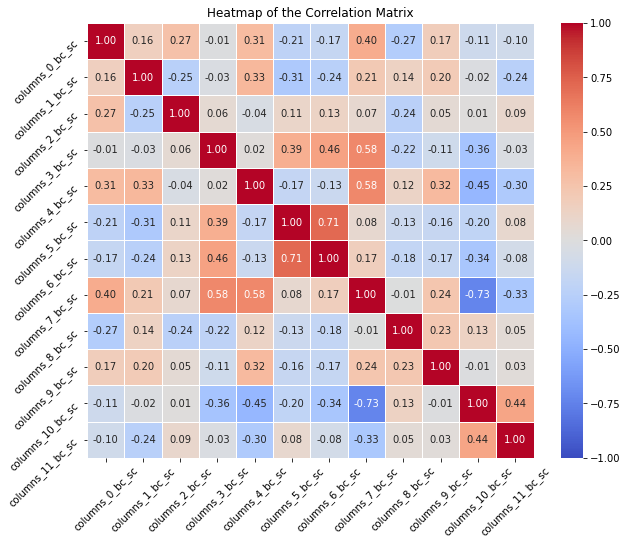

,Variable1,Variable2,Correlation
66,columns_5_bc_sc,columns_6_bc_sc,0.714493
77,columns_6_bc_sc,columns_5_bc_sc,0.714493
94,columns_7_bc_sc,columns_10_bc_sc,-0.730235
127,columns_10_bc_sc,columns_7_bc_sc,-0.730235


In [68]:
# Calculate the Spearman correlation matrix
corr_matrix = df_3[input_variables_bc_sc].corr(method='spearman')
create_heatmap(corr_matrix)
find_strong_correlations(corr_matrix, threshold=0.7)

### Key takeaways

The pair of variables 5-6, and 7-10 exhibit high correlations, indicating a potential relationship. This should be considered during variable selection. If both sets prove beneficial for the final model, it might be necessary to remove one from each pair to mitigate collinearity.

# 5. Feature Importance
The Input is numerical and the Output categorical, there are several test that may be conducted


## 5.1. ANOVA

In [69]:
# 1. Assuming df is your DataFrame and 'target' is your target variable
X = df_3.drop(input_variables_bc, axis=1)  # Independent variables
X = X.drop(target_variable, axis=1)  # Independent variables
y = df_3[target_variable]  # Dependent variable

# 2. Apply SelectKBest with ANOVA
selector = SelectKBest(score_func=f_classif, k='all')  # 'k' is the number of features to select, 'all' for all features
selector.fit(X, y)

# 3. Get scores for each feature
scores = selector.scores_

# 4. Create a DataFrame for better visibility of the results
# 4.1. Get F-values (scores) and p-values for each feature
scores = selector.scores_
p_values = selector.pvalues_

# 4.2. Create a DataFrame for better visibility of the results
feature_scores = pd.DataFrame({'Feature': X.columns, 'F_value': scores, 'p_value': p_values})
feature_scores = feature_scores.sort_values(by='F_value', ascending=False)

display(feature_scores)

,Feature,F_value,p_value
18,columns_6_bc_sc,4409.794692,0.000000e+00
6,columns_6,4216.807978,0.000000e+00
1,columns_1,3754.135085,0.000000e+00
16,columns_4_bc_sc,2980.737243,0.000000e+00
13,columns_1_bc_sc,2591.368887,0.000000e+00
4,columns_4,1918.158329,0.000000e+00
0,columns_0,1820.959434,0.000000e+00
17,columns_5_bc_sc,1731.794232,0.000000e+00
9,columns_9,1515.826767,5.552180e-295
21,columns_9_bc_sc,1371.660436,7.234321e-270


### Key takeaways
Considering a threshold of 5%, all variables could be deemed as providing significant value to the model. However, given the critical nature of the issue being addressed, which involves predicting health issues, adopting a more conservative threshold, such as 1%, seems prudent. This approach will lead to the exclusion of column 10. Additionally, since column 10 is highly correlated with column 7, removing it could help in reducing bias and enhancing the stability of the model.

Column 5 will be retained for the moment, although it remains a potential candidate for removal. Despite its apparent significance, combining it with column 6 in the model could introduce instability. This possibility warrants further investigation and consideration before finalizing the model's features.

## 5.2. Kruskall -  Wallis

In [70]:
input_variables_aux = input_variables.copy()
input_variables_aux.append(target_variable)

In [71]:
# Test de Kruskal-Wallis para cada variable numérica
df_aux = df_3[input_variables_aux].copy()
results = []
for column in df_aux.select_dtypes(include=['float64', 'int64']).columns:
    if column != target_variable:  # Asegúrate de excluir la variable categórica
        group1 = df_aux[df_aux[target_variable] == 0][column]
        group2 = df_aux[df_aux[target_variable] == 1][column]
        stat, p_value = stats.kruskal(group1, group2)
        results.append((column, stat, p_value))

# Crear un DataFrame con los resultados
results_df_aux = pd.DataFrame(results, columns=['Feature', 'Kruskal_Stat', 'P_value'])
results_df_aux = results_df_aux.sort_values(by='Kruskal_Stat', ascending=False)
results_df_aux

,Feature,Kruskal_Stat,P_value
6,columns_6,2098.792858,0.000000e+00
4,columns_4,2084.383389,0.000000e+00
1,columns_1,1652.612015,0.000000e+00
5,columns_5,1254.745077,7.724765e-275
9,columns_9,1120.273623,1.295880e-245
0,columns_0,917.432704,1.592943e-201
7,columns_7,815.362225,2.466473e-179
8,columns_8,488.106608,3.679547e-108
3,columns_3,299.189518,4.947080e-67
2,columns_2,89.178222,3.607990e-21


### Key take aways 
There are some benefits of this other text compared wth anova, and will serve to compared with what was obtained:
- Non-Parametric: Does not assume a normal distribution of data, ideal for non-normal data.
- Robust Against Outliers: Less sensitive to extreme values than ANOVA.
- Fewer Statistical Assumptions: Does not require homogeneity of variances, unlike ANOVA.

Behavioral is simlar, to what was found in the ANOVA test

# 6. Feature selection

In [72]:
import warnings

warnings.filterwarnings('ignore')

# 1. Fitlering out variables columns are not going to be used
df_4 = df_3.drop(input_variables_bc, axis =1)


In [73]:
# 2. Divide in test and Train
X = df_4.drop(target_variable, axis=1)  # Todas las columnas excepto la variable objetivo
y = df_4[target_variable]  # La variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

In [74]:
# 3. Dividing i two different approach enginieered variables and not
# 3.1. Train
X_train_initial = X_train[input_variables]
X_train_bc_sc = X_train[input_variables_bc_sc]
X_train_initial.drop([inputvar_10], axis=1,inplace=True)
X_train_bc_sc.drop([inputvar_10+"_bc_sc"], axis=1,inplace=True)

# 3.2. Test
X_test_initial = X_test[input_variables]
X_test_bc_sc = X_test[input_variables_bc_sc]
X_test_initial.drop([inputvar_10], axis=1,inplace=True)
X_test_bc_sc.drop([inputvar_10+"_bc_sc"], axis=1,inplace=True)


## 6.1. Backward

In [75]:
# 2. Selecting intial features Backward selection
# 2.1. Initial variables
classifier = LogisticRegression()
selected_features, best_score = backward_feature_elimination(X_train_initial, y_train, classifier,
                                                             scoring='recall', min_features=1, max_features=7)

print("Initial set of variables")
print("Features selected:", selected_features)
print("Best score:", best_score)
print("\n")

# 2.2. Enginieered features
classifier = LogisticRegression()
selected_features, best_score = backward_feature_elimination(X_train_bc_sc, y_train, classifier,
                                                             scoring='recall', min_features=1, max_features=7)

print("Engineerrided features")
print("Features selected:", selected_features)
print("Best score:", best_score)
print("\n")

# 2.3. All
classifier = LogisticRegression()
selected_features, best_score = backward_feature_elimination(X_train, y_train, classifier,
                                                             scoring='recall', min_features=1, max_features=7)

print("All")
print("Features selected:", selected_features)
print("Best score:", best_score)
print("\n")

Initial set of variables
Features selected: ['columns_0', 'columns_1', 'columns_4', 'columns_6', 'columns_7', 'columns_8', 'columns_9']
Best score: 0.9415204678362572


Engineerrided features
Features selected: ['columns_1_bc_sc', 'columns_3_bc_sc', 'columns_4_bc_sc', 'columns_6_bc_sc', 'columns_7_bc_sc', 'columns_8_bc_sc', 'columns_9_bc_sc']
Best score: 0.9859649122807017


All
Features selected: ['columns_3', 'columns_1_bc_sc', 'columns_4_bc_sc', 'columns_6_bc_sc', 'columns_7_bc_sc', 'columns_9_bc_sc', 'columns_10_bc_sc']
Best score: 0.9918128654970759




## 6.2. Forward selection

In [76]:
# 3. Selecting intial features forward selection
# 3.1. Initial variables
classifier = LogisticRegression()
selected_features, best_score = forward_feature_selection(X_train_initial, y_train, classifier,
                                                          scoring='recall', min_features=1, max_features=7)

print("Initial set of variables")
print("Features selected:", selected_features)
print("Best score:", best_score)
print("\n")

# 3.2. Enginieered features
classifier = LogisticRegression()
selected_features, best_score = forward_feature_selection(X_train_bc_sc, y_train, classifier,
                                                          scoring='recall', min_features=1, max_features=7)

print("Engineerrided features")
print("Features selected:", selected_features)
print("Best score:", best_score)
print("\n")

# 3.3. All
classifier = LogisticRegression()
selected_features, best_score = forward_feature_selection(X_train, y_train, classifier,
                                                          scoring='recall', min_features=1, max_features=7)

print("All")
print("Features selected:", selected_features)
print("Best score:", best_score)
print("\n")

Initial set of variables
Features selected: ['columns_6', 'columns_1', 'columns_9', 'columns_0', 'columns_8', 'columns_4']
Best score: 0.9497076023391813


Engineerrided features
Features selected: ['columns_6_bc_sc', 'columns_4_bc_sc', 'columns_1_bc_sc', 'columns_9_bc_sc', 'columns_7_bc_sc', 'columns_3_bc_sc', 'columns_8_bc_sc']
Best score: 0.9859649122807017


All
Features selected: ['columns_6', 'columns_4_bc_sc', 'columns_1_bc_sc', 'columns_9_bc_sc', 'columns_7_bc_sc', 'columns_3', 'columns_10']
Best score: 0.9906432748538011




## 6.3. Lasso

In [77]:
# 4. Selecting intial features lasso selection
# 4.1. Initial variables
selected_features= lasso_feature_selection(X_train_initial, y_train,
                                           scoring='recall', min_features=1, max_features=7)


print("Initial set of variables")
print("Features selected:", selected_features)
print("\n")

# 4.2. Enginieered features
selected_features = lasso_feature_selection(X_train_bc_sc, y_train,
                                            scoring='recall', min_features=1, max_features=7)

print("Engineerrided features")
print("Features selected:", selected_features)
print("\n")

# 4.3. All
selected_features = lasso_feature_selection(X_train, y_train,
                                            scoring='recall', min_features=1, max_features=7)

print("All")
print("Features selected:", selected_features)
print("\n")

Initial set of variables
Features selected: ['columns_7', 'columns_4', 'columns_1', 'columns_9', 'columns_8', 'columns_2', 'columns_0']


Engineerrided features
Features selected: ['columns_6_bc_sc', 'columns_7_bc_sc', 'columns_1_bc_sc', 'columns_3_bc_sc', 'columns_4_bc_sc', 'columns_0_bc_sc', 'columns_5_bc_sc']


All
Features selected: ['columns_7_bc_sc', 'columns_6_bc_sc', 'columns_1', 'columns_10', 'columns_11_bc_sc', 'columns_8', 'columns_11']




## 6.4. Ridge

In [78]:
# 4. Selecting intial features ridge selection
# 4.1. Initial variables
selected_features= ridge_feature_selection(X_train_initial, y_train,
                                           scoring='recall', min_features=1, max_features=7)


print("Initial set of variables")
print("Features selected:", selected_features)
print("\n")

# 4.2. Enginieered features
selected_features = ridge_feature_selection(X_train_bc_sc, y_train,
                                            scoring='recall', min_features=1, max_features=7)

print("Engineerrided features")
print("Features selected:", selected_features)
print("\n")

# 4.3. All
selected_features = ridge_feature_selection(X_train, y_train,
                                            scoring='recall', min_features=1, max_features=7)

print("All")
print("Features selected:", selected_features)
print("\n")

Initial set of variables
Features selected: ['columns_7', 'columns_4', 'columns_1', 'columns_9', 'columns_8', 'columns_2', 'columns_11']


Engineerrided features
Features selected: ['columns_6_bc_sc', 'columns_7_bc_sc', 'columns_1_bc_sc', 'columns_3_bc_sc', 'columns_4_bc_sc', 'columns_0_bc_sc', 'columns_5_bc_sc']


All
Features selected: ['columns_7', 'columns_6_bc_sc', 'columns_7_bc_sc', 'columns_8', 'columns_11_bc_sc', 'columns_1', 'columns_2']




Given your dataset with 5,000 clients and 22 columns (11 original and 11 added through transformations), the most suitable feature selection method would likely be Lasso (Least Absolute Shrinkage and Selection Operator). Here’s why:

- **Balance Between Feature Selection and Regularization:** Lasso is particularly effective when you have an extended set of features, including transformed or engineered features. It not only selects the most significant features but also performs regularization, which helps in managing overfitting.

- **Handling High-Dimensional Data:** With 22 features, your dataset is relatively high-dimensional. Lasso is adept at dealing with high-dimensional data, as it can shrink the coefficients of less important features to zero, effectively removing them.

- **Model Interpretability:** If you aim for a model that is easy to interpret, Lasso is advantageous. By reducing the number of features, it simplifies the model, making it easier to understand which features are driving your predictions.

- **Efficiency:** Compared to wrapper methods like RFE or forward selection, Lasso is computationally more efficient, which is crucial when working with thousands of data points.

In summary, Lasso strikes a good balance between reducing overfitting, handling a large number of features, and maintaining model interpretability and computational efficiency, as can be observed in the more time consumed to performed the other feature selection proccess.

Variables selected per each approach (All variables):
- Back: ['columns_3', 'columns_10', 'columns_1_bc_sc', 'columns_4_bc_sc', 'columns_6_bc_sc', 'columns_7_bc_sc', 'columns_9_bc_sc']
- Forward:['columns_6', 'columns_4_bc_sc', 'columns_1', 'columns_9_bc_sc', 'columns_7_bc_sc', 'columns_3', 'columns_10_bc_sc']
- Lasso: ['columns_7_bc_sc', 'columns_6_bc_sc', 'columns_1', 'columns_8', 'columns_10', 'columns_11_bc_sc', 'columns_10_bc_sc']
- Ridge: ['columns_7', 'columns_6_bc_sc', 'columns_8', 'columns_7_bc_sc', 'columns_2', 'columns_1', 'columns_11_bc_sc']

# 7. Modelling

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [80]:
# 0. Preparing final set of data
X_train = X_train[['columns_7_bc_sc', 'columns_6_bc_sc', 'columns_1', 'columns_8', 
                   'columns_10', 'columns_11_bc_sc', 'columns_10_bc_sc']]
X_test = X_test[['columns_7_bc_sc', 'columns_6_bc_sc', 'columns_1', 'columns_8', 
                 'columns_10', 'columns_11_bc_sc', 'columns_10_bc_sc']]

## 7.1. Logistic regression 

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       970
           1       0.96      0.95      0.96       198

    accuracy                           0.99      1168
   macro avg       0.98      0.97      0.98      1168
weighted avg       0.99      0.99      0.99      1168

Accuracy: 0.9863013698630136
AUROC: 0.9917369572008746
Gini: 0.9834739144017492


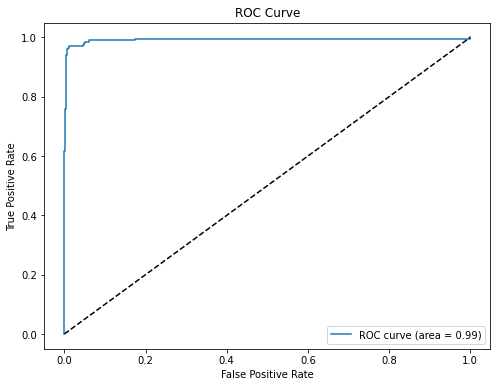

<Figure size 432x432 with 0 Axes>

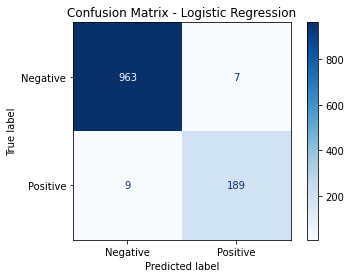

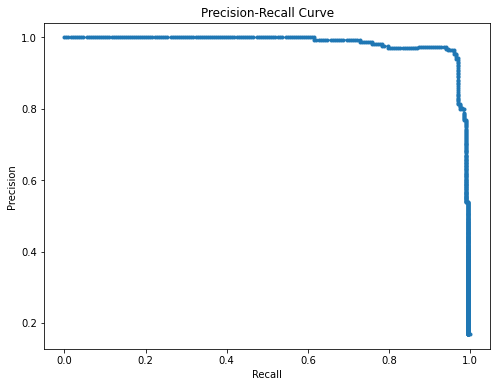

CV Scores: [0.98330122 0.98265896 0.98071979]


In [81]:
# 1. Initialize the logistic regression model
log_reg = LogisticRegression()

# 2. Define the hyperparameter space for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2']
}

# 3. Create GridSearchCV object
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# 4. Fit the model
grid_search.fit(X_train, y_train)

# 5. Get the best model
best_log_reg = grid_search.best_estimator_

# 6. Predict with the test set
y_pred = best_log_reg.predict(X_test)
y_pred_prob = best_log_reg.predict_proba(X_test)[:, 1]

# 7. Print classification report and accuracy
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# 8. AUROC and Gini
auroc = roc_auc_score(y_test, y_pred_prob)
gini = 2 * auroc - 1
print("AUROC:", auroc)
print("Gini:", gini)

# 9. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 10. Confusion Matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(best_log_reg, X_test, y_test, cmap=plt.cm.Blues, display_labels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Logistic Regression')
plt.grid(False)
plt.show()

# 11. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# 12. Perform cross-validation with the best model
cross_val_scores = cross_val_score(best_log_reg, X_train, y_train, cv=3)
print("CV Scores:", cross_val_scores)

## 7.2. Random forest

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       970
           1       0.99      0.96      0.97       198

    accuracy                           0.99      1168
   macro avg       0.99      0.98      0.98      1168
weighted avg       0.99      0.99      0.99      1168

Accuracy: 0.9914383561643836
AUROC: 0.9980578985733624
Gini: 0.9961157971467247


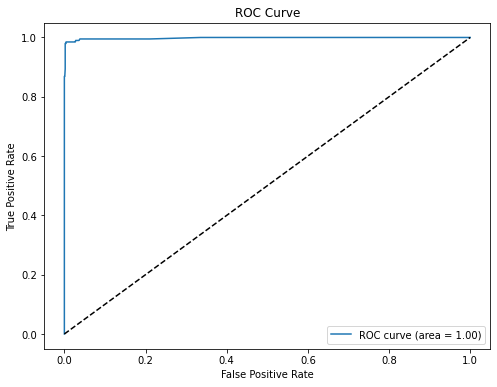

<Figure size 432x432 with 0 Axes>

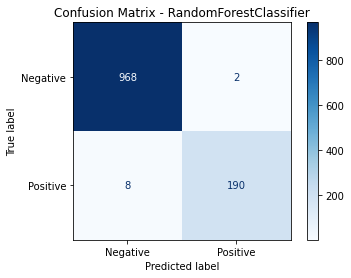

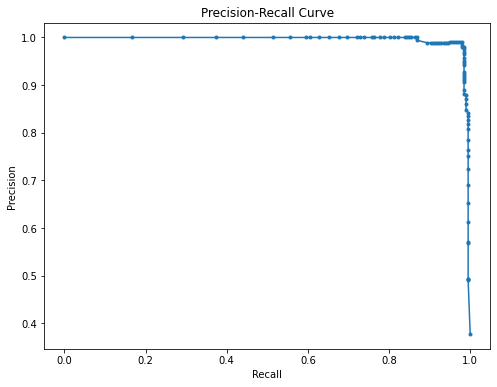

CV Scores: [0.98972383 0.98843931 0.98521851]


In [82]:
# 1. Initialize the model
classifier = RandomForestClassifier()

# 2. Define the hyperparameter space for GridSearchCV
param_grid = {
    'n_estimators': [100, 150, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 4, 6],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3]  # Minimum number of samples required to be at a leaf node
}

# 3. Create GridSearchCV object
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# 4. Fit the model
grid_search.fit(X_train, y_train)
pen curre

## 99. Auxiliar functions

In [83]:
def create_heatmap(corr_matrix):
    """
    Create heatmap correlation matrix

    Parameters:
    corr_matrix: matrix with correlation values

    Retorna:
    float: none
    """

    # Create the heatmap using seaborn
    plt.figure(figsize=(10, 8))  # You can adjust the size as needed
    sns.heatmap(corr_matrix, 
                annot=True,      # This places the correlation values in the plot
                cmap='coolwarm', # Choose a color palette you prefer
                vmin=-1, vmax=1, # Set limits for the correlation values
                fmt=".2f",       # Format for the numbers in the cells
                linewidths=.5)   # Space between the cells

    # Show the title and adjust the axes
    plt.title('Heatmap of the Correlation Matrix')
    plt.xticks(rotation=45)    # Rotate the x-axis labels for better visualization
    plt.yticks(rotation=45)    # Rotate the y-axis labels

    # Display the plot
    plt.show()

In [84]:
def find_strong_correlations(corr_matrix, threshold=0.7):
    """
    Extract pairs of variables with strong correlations from the correlation matrix.

    :param corr_matrix: A pandas DataFrame representing the correlation matrix.
    :param threshold: A float representing the threshold for strong correlations.
                      Defaults to 0.7. Can be adjusted as needed.
    :return: A pandas DataFrame containing pairs of variables with correlation
             values exceeding the threshold.
    """

    # Convert the correlation matrix to a long format
    pairs = corr_matrix.stack().reset_index()
    pairs.columns = ['Variable1', 'Variable2', 'Correlation']

    # Filter out pairs with absolute correlation above the threshold
    # and exclude pairs of the same variable
    strong_pairs = pairs[(abs(pairs['Correlation']) > threshold) & 
                         (pairs['Variable1'] != pairs['Variable2'])]

    return strong_pairs

In [85]:
def data_exploration(dataframe, variable_to_explore):
    """
    Performs basic data exploration on a specified variable within a DataFrame.
    
    :param dataframe: A pandas DataFrame containing the data.
    :param variable_to_explore: The name of the variable (column) to explore.
    """
    
    # 1. Print name of the variable
    display_styled_text(variable_to_explore, bold=True, font_size='18px')
    
    # 2. Sturges rule to determine the number of bins
    c = 1 + np.log2(dataframe.shape[0])
    c = int(round(c, 0))
    
    # 3. Display basic statistical descriptions
    display(dataframe[variable_to_explore].describe())
    
    # 4. Creating a subplot for boxplot and histogram
    plt.figure(figsize=(12, 6))  # Adjust figure size for better visualization
    
    # 5. Boxplot for outlier detection
    plt.subplot(121)
    plt.boxplot(dataframe[variable_to_explore])
    plt.xlabel(variable_to_explore)
    plt.ylabel('Frequency')
    plt.title('Boxplot')

    # 6. Histogram for distribution visualization
    plt.subplot(122)
    plt.hist(dataframe[variable_to_explore], bins=c)
    plt.xlabel(variable_to_explore)
    plt.title('Histogram')
    plt.show()
    
    # 7. Calculate Interquartile Range (IQR)
    iqr = dataframe[variable_to_explore].quantile(0.75) - dataframe[variable_to_explore].quantile(0.25)

    # 8. Identifying outliers using 1.5*IQR rule
    lower_outlier = dataframe[variable_to_explore].quantile(0.25) - 1.5 * iqr
    upper_outlier = dataframe[variable_to_explore].quantile(0.75) + 1.5 * iqr

    # 9. Identifying extreme outliers using 3*IQR rule
    lower_extreme = dataframe[variable_to_explore].quantile(0.25) - 3 * iqr
    upper_extreme = dataframe[variable_to_explore].quantile(0.75) + 3 * iqr
    
    # 10. Counting outliers and extreme outliers
    num_outliers = ((dataframe[variable_to_explore] < lower_outlier) | 
                    (dataframe[variable_to_explore] > upper_outlier)).sum()
    num_extreme_outliers = ((dataframe[variable_to_explore] < lower_extreme) | 
                            (dataframe[variable_to_explore] > upper_extreme)).sum()
    
    # 11. Calculating the percentage of outliers and extreme outliers
    total_values = len(dataframe[variable_to_explore])
    percent_outliers = (num_outliers / total_values) * 100
    percent_extreme_outliers = (num_extreme_outliers / total_values) * 100

    # 12. Calculating skewness and kurtosis
    skewness = dataframe[variable_to_explore].skew()
    kurtosis = dataframe[variable_to_explore].kurtosis()

    # 13. Printing IQR, outlier thresholds, counts, and percentages
    print("IQR:", iqr)
    print("Outliers: <", lower_outlier, "   >", upper_outlier, " - Count:", num_outliers, " - Percentage:", percent_outliers, "%") 
    print("Extreme outliers: <", lower_extreme, "   >", upper_extreme, " - Count:", num_extreme_outliers, " - Percentage:", percent_extreme_outliers, "%\n")
    print("Kurtosis:", kurtosis)
    print("Skewness:", skewness)


In [86]:
def display_styled_text(text, bold=False, font_size='16px'):
    """
    Displays text with HTML styling in a Jupyter Notebook.

    :param text: The text to display.
    :param bold: Boolean, if True the text will be displayed in bold.
    :param font_size: String, the size of the font (e.g., '16px').
    """
    # Apply bold style if required
    if bold:
        text = f"<b>{text}</b>"

    # Apply font size
    text = f"<span style='font-size: {font_size};'>{text}</span>"

    display(HTML(text))


In [87]:
def standardize_columns(dataframe, columns_to_standardize, suffix='_sc'):
    """
    Standardizes specified columns in a pandas DataFrame and adds them back to the DataFrame with a suffix.

    :param dataframe: A pandas DataFrame containing the data.
    :param columns_to_standardize: List of column names (strings) to be standardized.
    :param suffix: Suffix to be added to the names of standardized columns.
    :return: A DataFrame with the original data and standardized columns added with a suffix.
    """
    scaler = StandardScaler()
    
    # Create a copy of the DataFrame to avoid modifying the original
    dataframe_copy = dataframe.copy()

    # Standardize and add columns with the suffix
    for column in columns_to_standardize:
        standardized_column_name = column + suffix
        dataframe_copy[standardized_column_name] = scaler.fit_transform(dataframe_copy[[column]])
    
    return dataframe_copy

In [88]:
def apply_boxcox_transformation(dataframe, input_variables, suffix='_bc', adjustment=0.00001):
    """
    Applies Box-Cox transformation to specified variables in a DataFrame after adjusting values to be positive.

    :param dataframe: A pandas DataFrame containing the data.
    :param input_variables: List of column names (strings) to be transformed.
    :param suffix: Suffix to be added to the names of transformed variables.
    :param adjustment: A constant value to add to the variables to ensure positiveness.
    :return: A DataFrame with the original and Box-Cox transformed variables.
    """
    transformed_df = dataframe.copy()

    for variable in input_variables:
        # Adjust values to be positive
        adjusted_values = transformed_df[variable] + adjustment

        # Apply Box-Cox transformation
        transformed_column_name = variable + suffix
        transformed_df[transformed_column_name], _ = stats.boxcox(adjusted_values)

    return transformed_df

In [89]:
def backward_feature_elimination(X, y, classifier, scoring, max_features=10, min_features=1, cv=5):
    """
    Perform backward feature elimination.

    Parameters:
    - X: DataFrame, feature dataset
    - y: Series or array, target variable
    - classifier: machine learning model to be used
    - scoring: scoring metric to evaluate the model
    - max_features: int, maximum number of features to select
    - min_features: int, minimum number of features to retain
    - cv: int, number of cross-validation folds

    Returns:
    - best_features: list, the best set of features based on scoring
    - best_score: float, the highest score achieved with the best set of features
    """
    
    # Initialize the list of features and the best features found so far
    features = X.columns.tolist()
    best_features = features.copy()
    best_score = 0

    # Continue removing features until max_features is reached
    while len(features) > max_features:
        scores_with_feature = []

        # Iterate through each feature to evaluate its impact
        for feature in features:
            temp_features = features[:]
            temp_features.remove(feature)

            # Calculate the cross-validation score with the feature removed
            score = np.mean(cross_val_score(classifier, X[temp_features], y, cv=cv, scoring=scoring))
            scores_with_feature.append(score)

        # Find the maximum score achieved by removing a feature
        max_score = max(scores_with_feature)
        if max_score > best_score or len(features) > max_features:
            # Update the best score and remove the feature that leads to the best score
            best_score = max_score
            excluded_feature = features[scores_with_feature.index(max_score)]
            features.remove(excluded_feature)
            best_features = features.copy()
        else:
            # Stop if performance does not improve and max_features is reached
            break

        # Ensure the number of features does not fall below the minimum
        if len(features) < min_features:
            break

    # Return the list of best features and the best score
    return best_features, best_score

In [90]:
def forward_feature_selection(X, y, classifier, scoring, min_features=1, max_features=10, cv=5):
    """
    Perform forward feature selection.

    Parameters:
    - X: DataFrame, feature dataset
    - y: Series or array, target variable
    - classifier: machine learning model to be used
    - scoring: scoring metric to evaluate the model
    - min_features: int, minimum number of features to retain
    - max_features: int, maximum number of features to select
    - cv: int, number of cross-validation folds

    Returns:
    - selected_features: list, the set of selected features that provided the best score
    - best_score: float, the highest score achieved with the selected set of features
    """

    remaining_features = X.columns.tolist()
    selected_features = []
    best_score = 0

    # Continue adding features until max_features is reached or no more features are available
    while len(selected_features) < max_features and len(remaining_features) > 0:
        scores_with_new_feature = []

        # Evaluate the impact of adding each remaining feature
        for feature in remaining_features:
            temp_features = selected_features + [feature]
            score = np.mean(cross_val_score(classifier, X[temp_features], y, cv=cv, scoring=scoring))
            scores_with_new_feature.append(score)

        # Find the maximum score achieved by adding a new feature
        max_score = max(scores_with_new_feature)
        if max_score > best_score:
            # Update the best score and add the feature that leads to the best score
            best_score = max_score
            best_feature = remaining_features[scores_with_new_feature.index(max_score)]
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            # Stop if adding new features does not improve the score
            break

        # Ensure at least the minimum number of features is selected
        if len(selected_features) < min_features:
            continue

    # Return the list of selected features and the best score
    return selected_features, best_score

In [91]:
def lasso_feature_selection(X, y, scoring, max_features=10, min_features=1, cv=5):
    """
    Select features using Lasso regression model optimized for a specific scoring metric.
    
    :param X: pandas DataFrame, features
    :param y: pandas Series or numpy array, target variable
    :param scoring: str, scoring metric to optimize
    :param max_features: int, maximum number of features to select
    :param min_features: int, minimum number of features to select
    :return: List of selected feature names
    """
    # Define a range of alpha values for Lasso
    alphas = np.logspace(-4, 4, 20)

    # GridSearchCV to find the best alpha value
    lasso = Lasso()
    grid = GridSearchCV(estimator=lasso, param_grid=dict(alpha=alphas), scoring=scoring, cv=cv)
    grid.fit(X, y)

    # Fit Lasso model with the best alpha
    lasso_best = Lasso(alpha=grid.best_params_['alpha'])
    lasso_best.fit(X, y)

    # Sort features by their coefficients
    feature_importance = np.abs(lasso_best.coef_)
    features = np.argsort(feature_importance)[::-1]

    # Select top features based on max_features
    selected_features = X.columns[features[:max_features]]
    if len(selected_features) < min_features:
        selected_features = X.columns[features[:min_features]]

    return selected_features.tolist()

In [92]:
def ridge_feature_selection(X, y, scoring, max_features=10, min_features=1, cv=5):
    """
    Select features using Ridge regression model optimized for a specific scoring metric.
    
    :param X: pandas DataFrame, features
    :param y: pandas Series or numpy array, target variable
    :param scoring: str, scoring metric to optimize
    :param max_features: int, maximum number of features to select
    :param min_features: int, minimum number of features to select
    :return: List of selected feature names
    """
    # Define a range of alpha values for Ridge
    alphas = np.logspace(-4, 4, 20)

    # GridSearchCV to find the best alpha value
    ridge = Ridge()
    grid = GridSearchCV(estimator=ridge, param_grid=dict(alpha=alphas), scoring=scoring, cv=cv)
    grid.fit(X, y)

    # Fit Ridge model with the best alpha
    ridge_best = Ridge(alpha=grid.best_params_['alpha'])
    ridge_best.fit(X, y)

    # Sort features by the absolute value of their coefficients
    feature_importance = np.abs(ridge_best.coef_)
    features = np.argsort(feature_importance)[::-1]

    # Select top features based on max_features
    selected_features = X.columns[features[:max_features]]
    if len(selected_features) < min_features:
        selected_features = X.columns[features[:min_features]]

    return selected_features.tolist()


In [ ]:
class Triangle_area():
    
    def __init__(side, height):
        self.side_variable = side
        self.height_variable = height
    def area():
        return(side_variable * height_variable/2)



